In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

'Colab Notebooks'


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("klu2000030172/birds-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 276M/276M [00:16<00:00, 17.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/klu2000030172/birds-image-dataset/versions/1


In [4]:
# Install the Kaggle API
!pip install kaggle

# Create a Kaggle folder if it doesn't exist
!mkdir -p ~/.kaggle

In [5]:
# Copy the kaggle.json to the appropriate location
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riwaj111111","key":"4f87d63a52c5d0f05857576ffd2abe2e"}'}

In [6]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Change permissions

In [7]:
#!/bin/bash
!kaggle datasets download akash2907/bird-species-classification -p /content/ --unzip


Dataset URL: https://www.kaggle.com/datasets/akash2907/bird-species-classification
License(s): CC-BY-NC-SA-4.0
100% 1.37G/1.37G [01:03<00:00, 22.8MB/s]
100% 1.37G/1.37G [01:03<00:00, 23.1MB/s]


In [8]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from tqdm import tqdm
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.image import imread

from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal

import random
import os
from os import listdir
import warnings
warnings.filterwarnings('ignore')
print('compelete')

compelete


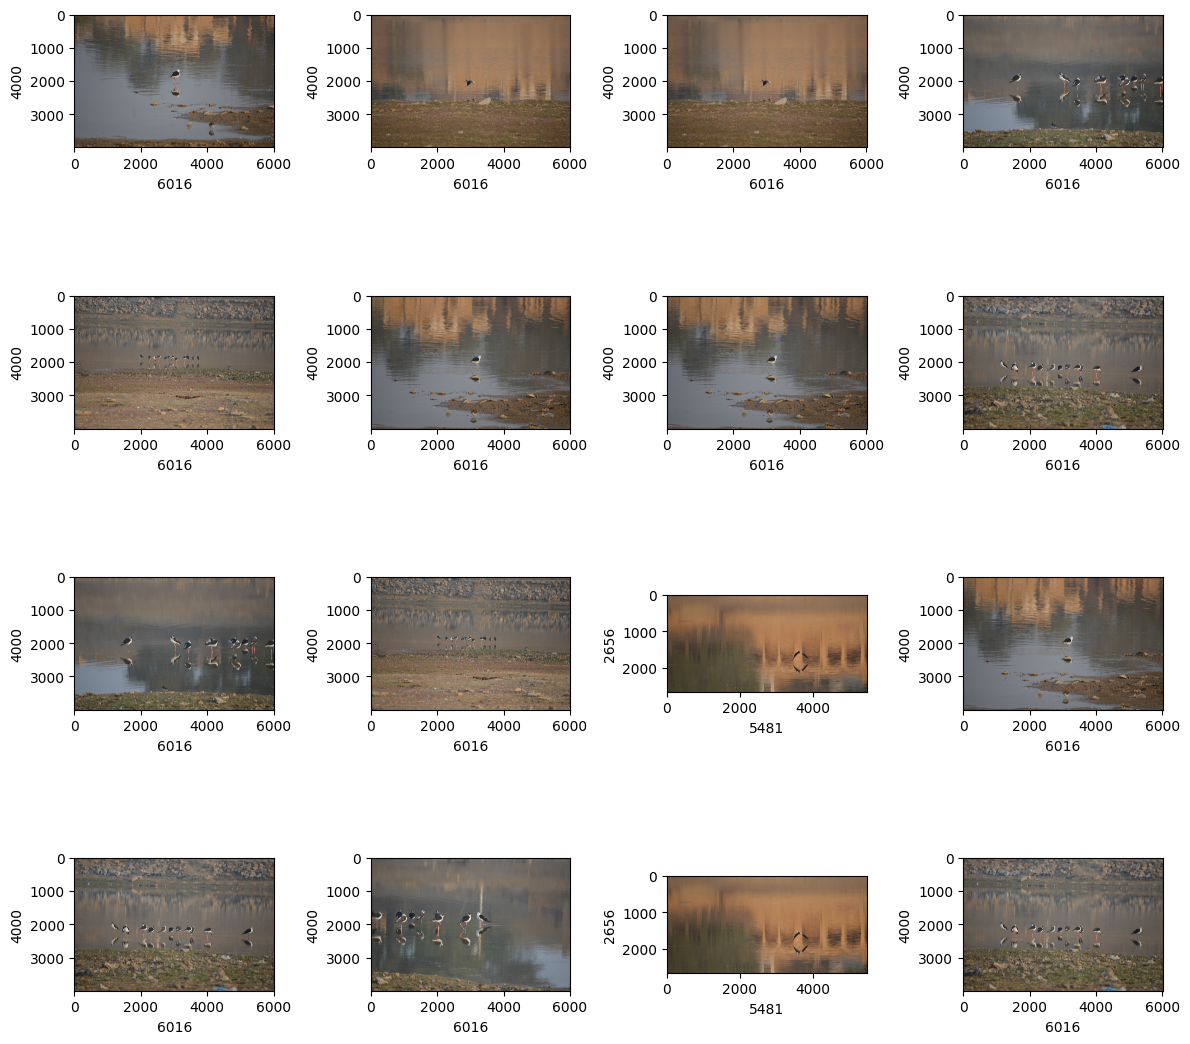

In [9]:
# Plotting 12 images to check the dataset

plt.figure(figsize=(12, 12))
path = '/content/train_data/train_data/blasti/'

for i in range(1,17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path + '/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
#

In [13]:
train_dir = "/content/train_data/train_data/"
test_dir = "/content/test_data/test_data/"

In [10]:

# apply scaling only becouse data already augmented
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [11]:
image_shape = (224,224)
batch_size = 64

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image shape and batch size
image_shape = (224, 224)
batch_size = 8

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of training data for validation
)

# Only rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
print("Training Images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Load validation data (20% of training data)
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Load test data (consider validation data as test data)
print("Test Images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Training Images:
Found 124 images belonging to 16 classes.
Validating Images:
Found 26 images belonging to 16 classes.
Test Images:
Found 157 images belonging to 16 classes.


In [15]:
import random
# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

ValueError: Sample larger than population or is negative

In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the MobileNet model pre-trained on ImageNet without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Define the new model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

# Add Fully Connected Layers
model.add(Dense(256, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(16, activation='softmax'))  # Adjust for 16 classes

# Compile the Model
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=1e-4)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stopping, reduce_lr]

# Model Summary
# model.summary()

# Training
# model.fit(train_data, validation_data=val_data, epochs=100, callbacks=callbacks)


In [17]:
epochs = 100
batch_size = 8

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=10,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with early stopping
history = model.fit(
    train_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=valid_data,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1078 - loss: 3.4445 - val_accuracy: 0.0769 - val_loss: 2.9917 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 861ms/step - accuracy: 0.0618 - loss: 3.5263 - val_accuracy: 0.1154 - val_loss: 2.9342 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 883ms/step - accuracy: 0.1327 - loss: 3.1241 - val_accuracy: 0.1538 - val_loss: 2.7635 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 831ms/step - accuracy: 0.1451 - loss: 2.9121 - val_accuracy: 0.1923 - val_loss: 2.6875 - learning_rate: 1.0000e-04
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 802ms/step - accuracy: 0.1543 - loss: 2.9772 - val_accuracy: 0.3462 - val_loss: 2.4760 - learning_rate: 1.0000e-04
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 858ms/step - accuracy: 0.1694 - loss: 2.9441 - val_accuracy: 0.3462 - val_loss: 2.3482 - learning_rate: 1.0000e-04
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 804ms/step -

# Testing and Evaluation


In [18]:

Y_pred = model.predict(test_data)
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5669 - loss: 1.7883
Test loss: 2.168172597885132
Test accuracy: 0.41401273012161255


In [19]:

# Extract class names from the datasets using class_indices
train_class_names = list(train_data.class_indices.keys())
valid_class_names = list(valid_data.class_indices.keys())
test_class_names = list(test_data.class_indices.keys())

# Print class names
print("Training Class Names:", train_class_names)
print("Validation Class Names:", valid_class_names)
print("Test Class Names:", test_class_names)

# Print the number of classes
print("Number of Training Classes:", len(train_class_names))
print("Number of Validation Classes:", len(valid_class_names))
print("Number of Test Classes:", len(test_class_names))


Training Class Names: ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Validation Class Names: ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Test Class Names: ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Number of Training Classes: 16
Number of Validation Classes: 16
Number of Test Classes: 16


In [20]:
CLASS_NAMES = train_class_names
CLASS_NAMES

['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']

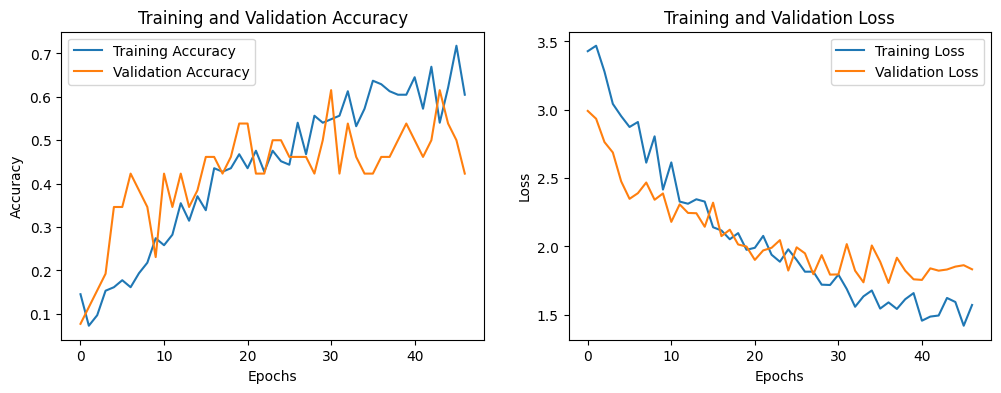

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = CLASS_NAMES

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 836ms/step
Classification Report:
               precision    recall  f1-score   support

      blasti       0.50      1.00      0.67         3
      bonegl       0.00      0.00      0.00         1
      brhkyt       0.00      0.00      0.00         1
      cbrtsh       0.00      0.00      0.00         1
      cmnmyn       1.00      1.00      1.00         1
      gretit       1.00      1.00      1.00         1
      hilpig       0.50      0.50      0.50         2
      himbul       1.00      0.33      0.50         3
      himgri       0.60      0.75      0.67         4
      hsparo       0.00      0.00      0.00         1
      indvul       0.00      0.00      0.00         1
      jglowl       0.00      0.00      0.00         1
      lbicrw       0.00      0.00      0.00         1
      mgprob       0.00      0.00      0.00         1
      rebimg       0.50      1.00      0.67         2
      wcrsrt       1.00      0.50      0.67         2

    accuracy     

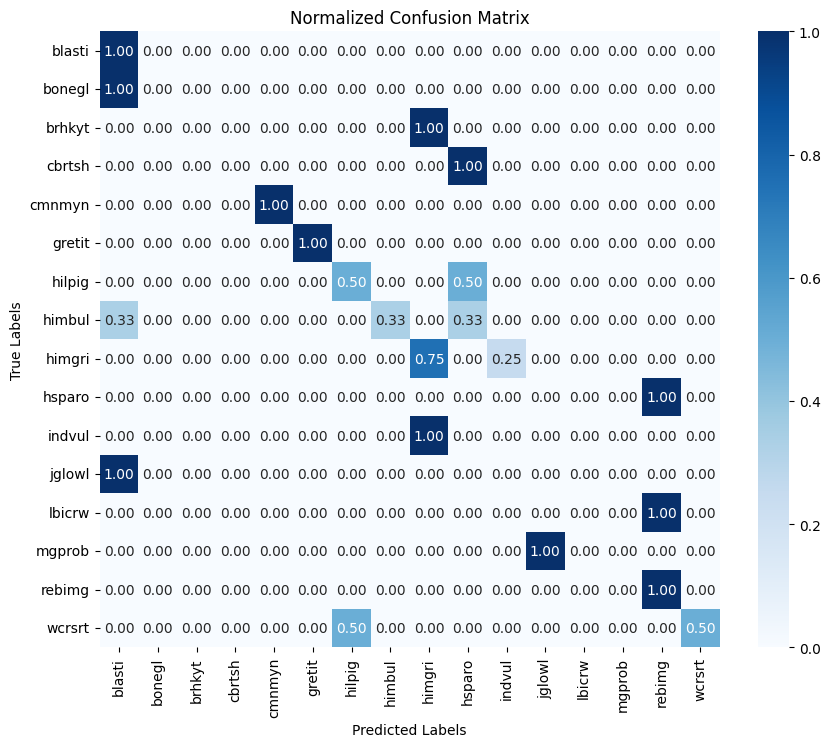

In [22]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on validation data
Y_pred = model.predict(valid_data)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = valid_data.classes  # Actual class labels from validation data

# Generate a classification report
CLASS_NAMES = list(valid_data.class_indices.keys())  # Extract class names from validation data generator
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=CLASS_NAMES))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [56]:

num_images = 5  # Change this to display more or fewer images

# Predict on test data
Y_test_pred = model.predict(test_data)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)
Y_test_true_classes = np.argmax(test_data, axis=1)

# Plot images with true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(5, 4, i + 1)  # Adjust grid size for more images (e.g., 5x4 grid for 20 images)
    plt.imshow(test_data[i])  # Display the image
    plt.axis('off')

    # Set the title with true and predicted labels
    true_label = CLASS_NAMES[Y_test_true_classes[i]]
    pred_label = CLASS_NAMES[Y_test_pred_classes[i]]
    color = 'green' if true_label == pred_label else 'red'  # Green if correct, red if incorrect

    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)

plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


KeyboardInterrupt: 

# GUI Implementation


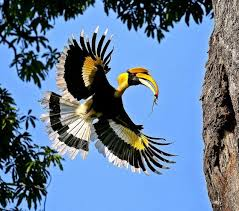

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [23]:
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import tensorflow as tf

# Load your pre-trained model
model = model  # Assuming your model is already loaded

# Define class names
CLASS_NAMES = CLASS_NAMES  # Use your actual class names here

# Function to preprocess and predict the image
def predict_image(img):
    img_resized = img.resize((224, 224))
    img_array = np.array(img_resized) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict and get confidence score
    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    pred_index = np.argmax(confidence_scores)
    pred_class = CLASS_NAMES[pred_index]
    pred_confidence = confidence_scores[pred_index]

    result_label.value = f"Prediction: {pred_class}\nConfidence: {pred_confidence:.2f}"

# Define widgets
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
result_label = widgets.Label()

# Display the uploaded image and perform prediction
def on_upload_change(change):
    # Clear previous output (remove old image and result)
    clear_output(wait=True)

    # Re-display the upload button and result label
    display(widgets.VBox([upload_button, result_label]))

    for name, file_info in upload_button.value.items():
        image_data = io.BytesIO(file_info['content'])  # Convert binary content to a BytesIO object
        image = Image.open(image_data)  # Open image with PIL
        display(image)  # Display the uploaded image in the notebook
        predict_image(image)

upload_button.observe(on_upload_change, names='value')

# Display widgets
display(widgets.VBox([upload_button, result_label]))



In [24]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [31]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [33]:
import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf

# Load your pre-trained model
model = model

# Define class names
CLASS_NAMES = CLASS_NAMES

# Define prediction function
def predict(image):
    img_resized = image.resize((224, 224))  # Resize image to model input size
    img_array = np.array(img_resized) / 255.0  # Normalize image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict and get confidence score
    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    pred_index = np.argmax(confidence_scores)
    pred_class = CLASS_NAMES[pred_index]
    pred_confidence = confidence_scores[pred_index]

    return f"Prediction: {pred_class} | Confidence: {pred_confidence:.2f}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),  # Correct usage of Gradio's new API
    outputs="text",
    title="Image Classification",
    description="Upload an image to predict its class."
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5832496e0971a3a24d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.231.165:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2024-11-15T07:57:38+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.